In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
landmarks_frame = pd.read_csv('DITS-full\DITS-full\DITS-detection\class\classes.csv')

n = 1
img_name = 'DITS-full\DITS-full\DITS-detection\class\image\\'+landmarks_frame.iloc[0, 0]
landmarks = landmarks_frame.iloc[n, 1]

print('Image name: {}'.format(img_name))
print('Type: {}'.format(landmarks))


Image name: DITS-full\DITS-full\DITS-detection\class\image\0.png
Type: 0


In [3]:
class StreetSignDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        
        # Carica le landmarks come array NumPy e assicurati che abbiano sempre dimensioni consistenti
        landmarks = np.array(str(self.landmarks_frame.iloc[idx, 1]).split(), dtype=np.float32)

        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [4]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)

        image = image[top: top + new_h,
                      left: left + new_w]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        landmarks = np.array(landmarks, dtype=np.float32)  # Converti landmarks in un array NumPy
        
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [5]:
tran= transforms.Compose([Rescale(256),RandomCrop(224),ToTensor()])

In [6]:
sign_dataset = StreetSignDataset('DITS-full\DITS-full\DITS-detection\class\classes.csv','DITS-full\DITS-full\DITS-detection\class\image',tran)

fig = plt.figure()

for i, sample in enumerate(sign_dataset):
    print(i, sample['image'].size(), sample['landmarks'])

0 torch.Size([3, 224, 224]) tensor([0.])
1 torch.Size([3, 224, 224]) tensor([0.])
2 torch.Size([3, 224, 224]) tensor([0.])
3 torch.Size([3, 224, 224]) tensor([0.])
4 torch.Size([3, 224, 224]) tensor([0.])
5 torch.Size([3, 224, 224]) tensor([0.])
6 torch.Size([3, 224, 224]) tensor([0.])
7 torch.Size([3, 224, 224]) tensor([0.])
8 torch.Size([3, 224, 224]) tensor([0.])
9 torch.Size([3, 224, 224]) tensor([0.])
10 torch.Size([3, 224, 224]) tensor([0.])
11 torch.Size([3, 224, 224]) tensor([0.])
12 torch.Size([3, 224, 224]) tensor([0.])
13 torch.Size([3, 224, 224]) tensor([0.])
14 torch.Size([3, 224, 224]) tensor([0.])
15 torch.Size([3, 224, 224]) tensor([0.])
16 torch.Size([3, 224, 224]) tensor([0.])
17 torch.Size([3, 224, 224]) tensor([0.])
18 torch.Size([3, 224, 224]) tensor([0.])
19 torch.Size([3, 224, 224]) tensor([0.])
20 torch.Size([3, 224, 224]) tensor([0.])
21 torch.Size([3, 224, 224]) tensor([0.])
22 torch.Size([3, 224, 224]) tensor([0.])
23 torch.Size([3, 224, 224]) tensor([0.])
24

194 torch.Size([3, 224, 224]) tensor([0.])
195 torch.Size([3, 224, 224]) tensor([0.])
196 torch.Size([3, 224, 224]) tensor([0.])
197 torch.Size([3, 224, 224]) tensor([0.])
198 torch.Size([3, 224, 224]) tensor([0.])
199 torch.Size([3, 224, 224]) tensor([0.])
200 torch.Size([3, 224, 224]) tensor([0.])
201 torch.Size([3, 224, 224]) tensor([0.])
202 torch.Size([3, 224, 224]) tensor([0.])
203 torch.Size([3, 224, 224]) tensor([0.])
204 torch.Size([3, 224, 224]) tensor([0.])
205 torch.Size([3, 224, 224]) tensor([0.])
206 torch.Size([3, 224, 224]) tensor([0.])
207 torch.Size([3, 224, 224]) tensor([0.])
208 torch.Size([3, 224, 224]) tensor([0.])
209 torch.Size([3, 224, 224]) tensor([0.])
210 torch.Size([3, 224, 224]) tensor([0.])
211 torch.Size([3, 224, 224]) tensor([0.])
212 torch.Size([3, 224, 224]) tensor([0.])
213 torch.Size([3, 224, 224]) tensor([0.])
214 torch.Size([3, 224, 224]) tensor([0.])
215 torch.Size([3, 224, 224]) tensor([0.])
216 torch.Size([3, 224, 224]) tensor([0.])
217 torch.S

390 torch.Size([3, 224, 224]) tensor([1.])
391 torch.Size([3, 224, 224]) tensor([1.])
392 torch.Size([3, 224, 224]) tensor([1.])
393 torch.Size([3, 224, 224]) tensor([1.])
394 torch.Size([3, 224, 224]) tensor([1.])
395 torch.Size([3, 224, 224]) tensor([1.])
396 torch.Size([3, 224, 224]) tensor([1.])
397 torch.Size([3, 224, 224]) tensor([1.])
398 torch.Size([3, 224, 224]) tensor([1.])
399 torch.Size([3, 224, 224]) tensor([1.])
400 torch.Size([3, 224, 224]) tensor([1.])
401 torch.Size([3, 224, 224]) tensor([1.])
402 torch.Size([3, 224, 224]) tensor([1.])
403 torch.Size([3, 224, 224]) tensor([1.])
404 torch.Size([3, 224, 224]) tensor([1.])
405 torch.Size([3, 224, 224]) tensor([1.])
406 torch.Size([3, 224, 224]) tensor([1.])
407 torch.Size([3, 224, 224]) tensor([1.])
408 torch.Size([3, 224, 224]) tensor([1.])
409 torch.Size([3, 224, 224]) tensor([1.])
410 torch.Size([3, 224, 224]) tensor([1.])
411 torch.Size([3, 224, 224]) tensor([1.])
412 torch.Size([3, 224, 224]) tensor([1.])
413 torch.S

584 torch.Size([3, 224, 224]) tensor([1.])
585 torch.Size([3, 224, 224]) tensor([1.])
586 torch.Size([3, 224, 224]) tensor([1.])
587 torch.Size([3, 224, 224]) tensor([1.])
588 torch.Size([3, 224, 224]) tensor([1.])
589 torch.Size([3, 224, 224]) tensor([1.])
590 torch.Size([3, 224, 224]) tensor([1.])
591 torch.Size([3, 224, 224]) tensor([1.])
592 torch.Size([3, 224, 224]) tensor([1.])
593 torch.Size([3, 224, 224]) tensor([1.])
594 torch.Size([3, 224, 224]) tensor([1.])
595 torch.Size([3, 224, 224]) tensor([1.])
596 torch.Size([3, 224, 224]) tensor([1.])
597 torch.Size([3, 224, 224]) tensor([1.])
598 torch.Size([3, 224, 224]) tensor([1.])
599 torch.Size([3, 224, 224]) tensor([1.])
600 torch.Size([3, 224, 224]) tensor([1.])
601 torch.Size([3, 224, 224]) tensor([1.])
602 torch.Size([3, 224, 224]) tensor([1.])
603 torch.Size([3, 224, 224]) tensor([1.])
604 torch.Size([3, 224, 224]) tensor([1.])
605 torch.Size([3, 224, 224]) tensor([1.])
606 torch.Size([3, 224, 224]) tensor([1.])
607 torch.S

792 torch.Size([3, 224, 224]) tensor([1.])
793 torch.Size([3, 224, 224]) tensor([1.])
794 torch.Size([3, 224, 224]) tensor([1.])
795 torch.Size([3, 224, 224]) tensor([1.])
796 torch.Size([3, 224, 224]) tensor([1.])
797 torch.Size([3, 224, 224]) tensor([1.])
798 torch.Size([3, 224, 224]) tensor([1.])
799 torch.Size([3, 224, 224]) tensor([1.])
800 torch.Size([3, 224, 224]) tensor([1.])
801 torch.Size([3, 224, 224]) tensor([1.])
802 torch.Size([3, 224, 224]) tensor([1.])
803 torch.Size([3, 224, 224]) tensor([1.])
804 torch.Size([3, 224, 224]) tensor([1.])
805 torch.Size([3, 224, 224]) tensor([1.])
806 torch.Size([3, 224, 224]) tensor([1.])
807 torch.Size([3, 224, 224]) tensor([1.])
808 torch.Size([3, 224, 224]) tensor([1.])
809 torch.Size([3, 224, 224]) tensor([1.])
810 torch.Size([3, 224, 224]) tensor([1.])
811 torch.Size([3, 224, 224]) tensor([1.])
812 torch.Size([3, 224, 224]) tensor([1.])
813 torch.Size([3, 224, 224]) tensor([1.])
814 torch.Size([3, 224, 224]) tensor([1.])
815 torch.S

993 torch.Size([3, 224, 224]) tensor([1.])
994 torch.Size([3, 224, 224]) tensor([1.])
995 torch.Size([3, 224, 224]) tensor([1.])
996 torch.Size([3, 224, 224]) tensor([1.])
997 torch.Size([3, 224, 224]) tensor([1.])
998 torch.Size([3, 224, 224]) tensor([1.])
999 torch.Size([3, 224, 224]) tensor([1.])
1000 torch.Size([3, 224, 224]) tensor([1.])
1001 torch.Size([3, 224, 224]) tensor([1.])
1002 torch.Size([3, 224, 224]) tensor([1.])
1003 torch.Size([3, 224, 224]) tensor([1.])
1004 torch.Size([3, 224, 224]) tensor([1.])
1005 torch.Size([3, 224, 224]) tensor([1.])
1006 torch.Size([3, 224, 224]) tensor([1.])
1007 torch.Size([3, 224, 224]) tensor([1.])
1008 torch.Size([3, 224, 224]) tensor([1.])
1009 torch.Size([3, 224, 224]) tensor([1.])
1010 torch.Size([3, 224, 224]) tensor([1.])
1011 torch.Size([3, 224, 224]) tensor([1.])
1012 torch.Size([3, 224, 224]) tensor([1.])
1013 torch.Size([3, 224, 224]) tensor([1.])
1014 torch.Size([3, 224, 224]) tensor([1.])
1015 torch.Size([3, 224, 224]) tensor([

1189 torch.Size([3, 224, 224]) tensor([2.])
1190 torch.Size([3, 224, 224]) tensor([2.])
1191 torch.Size([3, 224, 224]) tensor([2.])
1192 torch.Size([3, 224, 224]) tensor([2.])
1193 torch.Size([3, 224, 224]) tensor([2.])
1194 torch.Size([3, 224, 224]) tensor([2.])
1195 torch.Size([3, 224, 224]) tensor([2.])
1196 torch.Size([3, 224, 224]) tensor([2.])
1197 torch.Size([3, 224, 224]) tensor([2.])
1198 torch.Size([3, 224, 224]) tensor([2.])
1199 torch.Size([3, 224, 224]) tensor([2.])
1200 torch.Size([3, 224, 224]) tensor([2.])
1201 torch.Size([3, 224, 224]) tensor([2.])
1202 torch.Size([3, 224, 224]) tensor([2.])
1203 torch.Size([3, 224, 224]) tensor([2.])
1204 torch.Size([3, 224, 224]) tensor([2.])
1205 torch.Size([3, 224, 224]) tensor([2.])
1206 torch.Size([3, 224, 224]) tensor([2.])
1207 torch.Size([3, 224, 224]) tensor([2.])
1208 torch.Size([3, 224, 224]) tensor([2.])
1209 torch.Size([3, 224, 224]) tensor([2.])
1210 torch.Size([3, 224, 224]) tensor([2.])
1211 torch.Size([3, 224, 224]) t

1382 torch.Size([3, 224, 224]) tensor([2.])
1383 torch.Size([3, 224, 224]) tensor([2.])
1384 torch.Size([3, 224, 224]) tensor([2.])
1385 torch.Size([3, 224, 224]) tensor([2.])
1386 torch.Size([3, 224, 224]) tensor([2.])
1387 torch.Size([3, 224, 224]) tensor([2.])
1388 torch.Size([3, 224, 224]) tensor([2.])
1389 torch.Size([3, 224, 224]) tensor([2.])
1390 torch.Size([3, 224, 224]) tensor([2.])
1391 torch.Size([3, 224, 224]) tensor([2.])
1392 torch.Size([3, 224, 224]) tensor([2.])
1393 torch.Size([3, 224, 224]) tensor([2.])
1394 torch.Size([3, 224, 224]) tensor([2.])
1395 torch.Size([3, 224, 224]) tensor([2.])
1396 torch.Size([3, 224, 224]) tensor([2.])
1397 torch.Size([3, 224, 224]) tensor([2.])
1398 torch.Size([3, 224, 224]) tensor([2.])
1399 torch.Size([3, 224, 224]) tensor([2.])
1400 torch.Size([3, 224, 224]) tensor([2.])
1401 torch.Size([3, 224, 224]) tensor([2.])
1402 torch.Size([3, 224, 224]) tensor([2.])
1403 torch.Size([3, 224, 224]) tensor([2.])
1404 torch.Size([3, 224, 224]) t

<Figure size 640x480 with 0 Axes>

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 1])
Landmarks shape for sample 0: torch.Size([1])


RuntimeError: shape '[1, 2]' is invalid for input of size 1

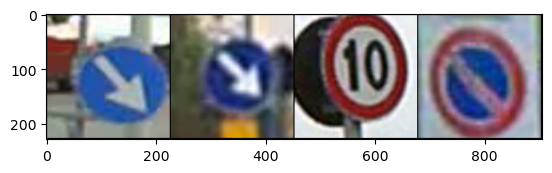

In [14]:
dataloader = DataLoader(sign_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
        sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        print(f"Landmarks shape for sample {i}: {landmarks_batch[i].shape}")
        landmarks = landmarks_batch[i].view(1, 2)  # Reshape per renderli bidimensionali
        print(f"Reshaped landmarks shape for sample {i}: {landmarks.shape}")
        plt.scatter(landmarks[:, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks[:, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

    plt.title('Batch from dataloader')


# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change ``num_workers`` to 0.

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [76]:
class Crop(object):
    """Crop randomly the image in a sample.

    Args:
        top_w (int): Top left corner's width coordinate.
        top_h (int): Top left corner's height coordinate.
        bottom_w (int): Bottom right corner's width coordinate.
        bottom_h (int): Bottom right corner's height coordinate.
    """

    def __init__(self, top_w, top_h, bottom_w, bottom_h):
        self.top_w = top_w
        self.top_h = top_h
        self.bottom_w = bottom_w
        self.bottom_h = bottom_h

    def __call__(self, sample):
        image = sample['image']
        image = image[self.top_h:self.bottom_h, self.top_w:self.bottom_w]

        return {'image': image, 'landmarks': sample['landmarks']}


In [91]:
class StreetSignTest(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        print(img_name)

        # Croppa le immagini con la funzione CROP da noi creata per lo scopo
        top_w = int(self.landmarks_frame.iloc[idx, 1])
        top_h = int(self.landmarks_frame.iloc[idx, 2])
        bottom_w = int(self.landmarks_frame.iloc[idx, 3])
        bottom_h = int(self.landmarks_frame.iloc[idx, 4])

        image = image[top_h:bottom_h, top_w:bottom_w]
        
        print(top_w)
        print(top_h)
        print(bottom_w)
        print(bottom_h)
        
        # Carica le landmarks come array NumPy e assicurati che abbiano sempre dimensioni consistenti
        landmarks = np.array(str(self.landmarks_frame.iloc[idx, 5]).split(), dtype=np.float32)
        
        print(landmarks)

        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [92]:
tran= transforms.Compose([Rescale(256),ToTensor()])
datatest = StreetSignTest('DITS-full\DITS-full\DITS-detection\detection_test\day\classe.csv','DITS-full\DITS-full\DITS-detection\detection_test\day',tran)

DITS-full\DITS-full\DITS-detection\detection_test\day\1.png
633
112
696
175
[0.]
DITS-full\DITS-full\DITS-detection\detection_test\day\1.png
369
190
428
249
[2.]
DITS-full\DITS-full\DITS-detection\detection_test\day\4.png
997
89
1186
278
[1.]
DITS-full\DITS-full\DITS-detection\detection_test\day\5.png
390
326
432
368
[0.]
0 torch.Size([4, 3, 256, 256]) torch.Size([4, 1])
DITS-full\DITS-full\DITS-detection\detection_test\day\5.png
789
342
831
384
[0.]
DITS-full\DITS-full\DITS-detection\detection_test\day\5.png
1012
296
1040
324
[0.]
DITS-full\DITS-full\DITS-detection\detection_test\day\7.png
709
329
767
387
[1.]
DITS-full\DITS-full\DITS-detection\detection_test\day\7.png
711
371
769
429
[1.]
1 torch.Size([4, 3, 256, 256]) torch.Size([4, 1])
DITS-full\DITS-full\DITS-detection\detection_test\day\8.png
1066
128
1130
192
[1.]
DITS-full\DITS-full\DITS-detection\detection_test\day\10.png
921
345
1006
430
[1.]
DITS-full\DITS-full\DITS-detection\detection_test\day\12.png
778
163
830
215
[1.]
DI

RuntimeError: shape '[1, 2]' is invalid for input of size 1

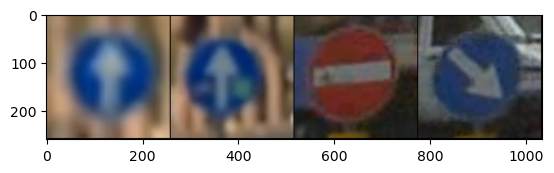

In [93]:
dataloader = DataLoader(datatest, batch_size=4,
                        shuffle=False, num_workers=0)

#print(datatest["landmarks"])

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break